In [ ]:
! pip install folium matplotlib mapclassify
import folium
import json
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

TASK FOR TEACHING SOMEONE 
Load the hotel booking dataset and answer the following questions:
MEMO

**QUESTION ONE** 
Which hotels had  lead times greater than 100?

In [77]:
# Load csv file 
df = pd.read_csv('C:/Users/HP/Desktop/Joyce/hotel_bookings.csv',encoding_errors = 'replace')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [18]:
#Show hotel with lead time greater than 100
lead =df['lead_time']>100
df =df[lead]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
24,Resort Hotel,0,127,2015,July,27,1,2,5,2,...,No Deposit,115.0,NaN,0,Contract,94.95,0,1,Check-Out,2015-07-01
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.00,0,2,Check-Out,2015-07-15
44,Resort Hotel,0,107,2015,July,27,2,2,5,2,...,No Deposit,240.0,NaN,0,Transient,110.70,0,2,Check-Out,2015-07-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


**QUESTION TWO**
show collinearity of hotel cancellations


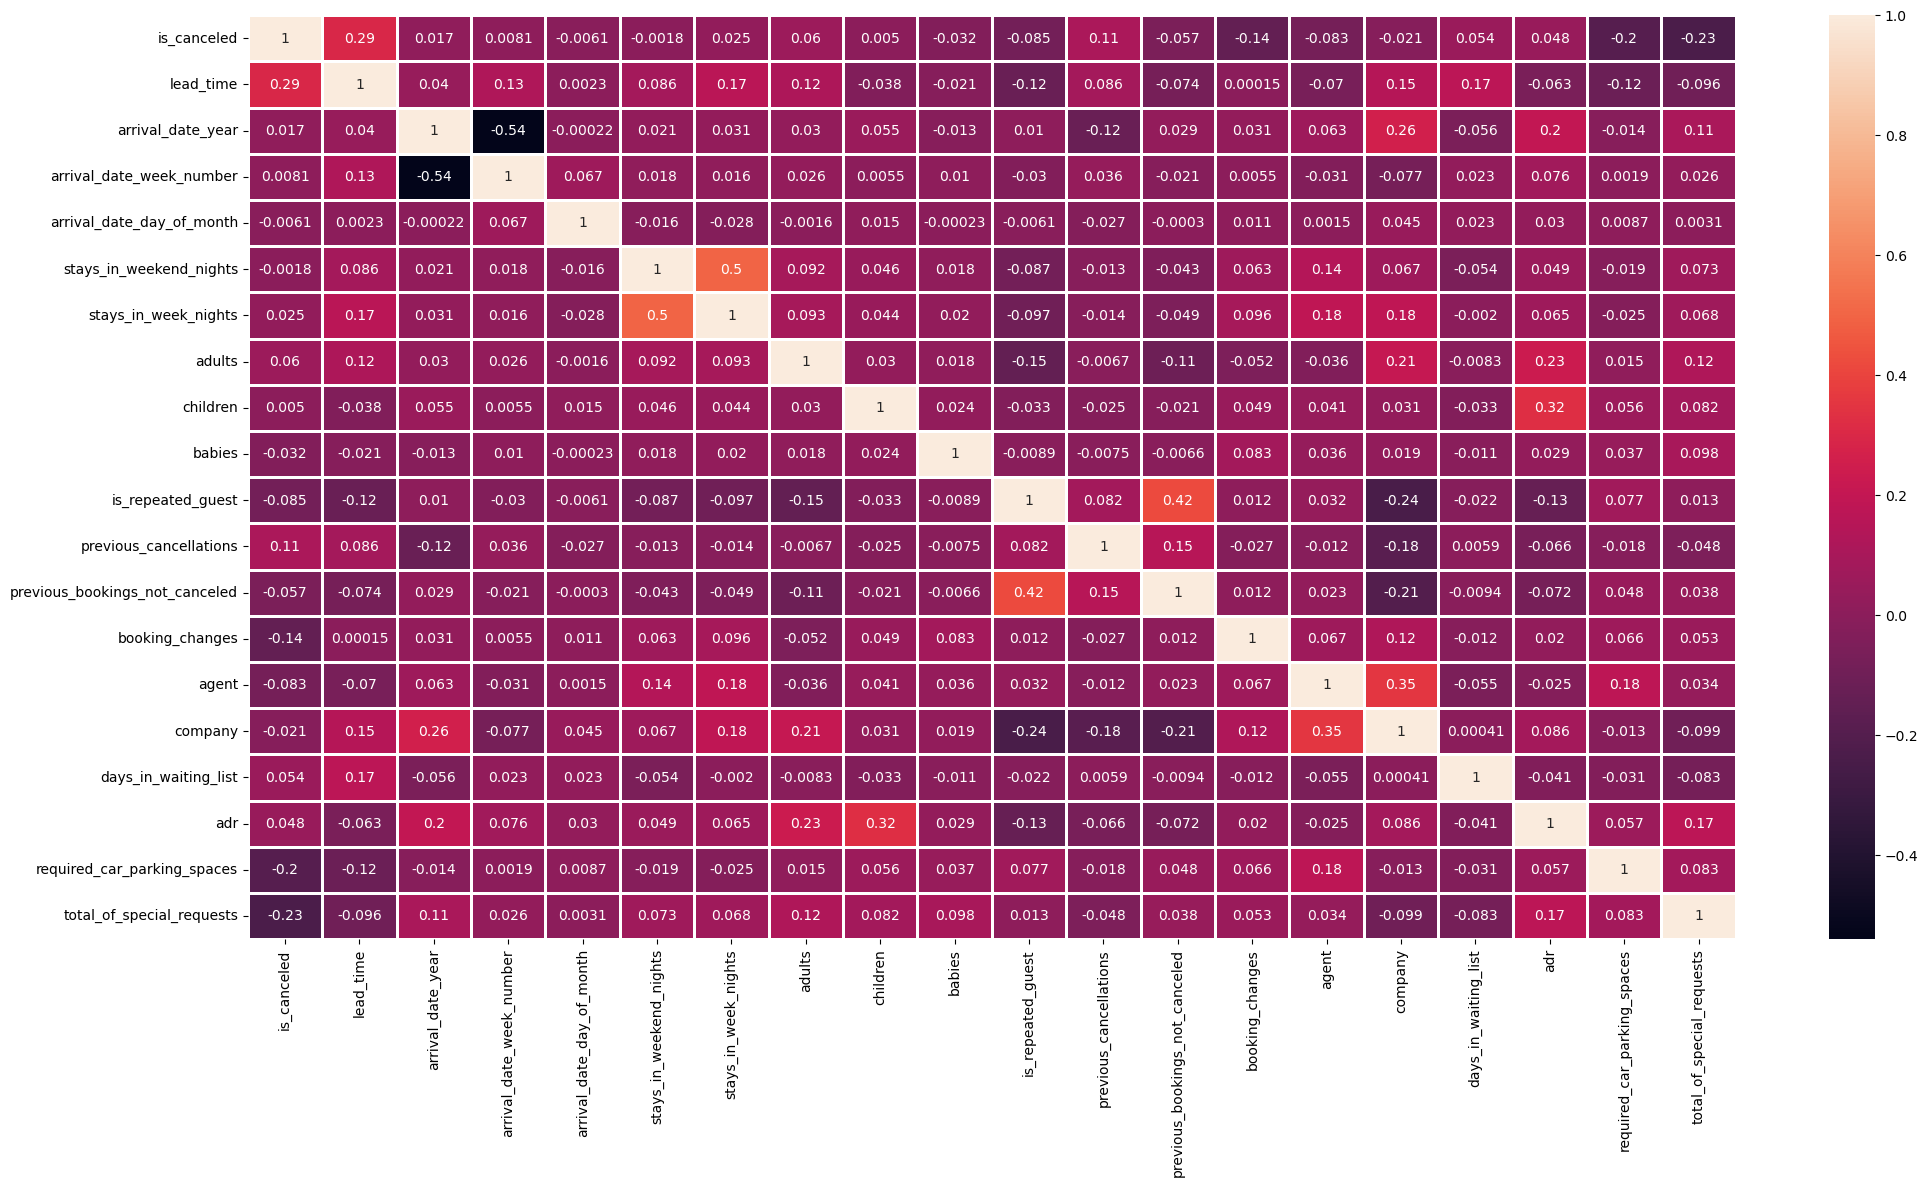

In [81]:
#plot heatmap
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()


**QUESTION THREE**
 Calculate mean per hotel


In [78]:
hotels_mean_df = df.groupby('hotel').mean()
hotels_mean_df.reset_index(inplace=True)
hotels_mean_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,...,0.025615,0.079743,0.132371,0.187369,28.144721,145.271618,3.226774,105.304465,0.024367,0.546918
1,Resort Hotel,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,...,0.044383,0.101722,0.146455,0.287968,217.571725,241.486165,0.527758,94.952930,0.138068,0.619770


**QUESTION FOUR**
Plot barchart and boxplot hotel cancellations with cancelled guests

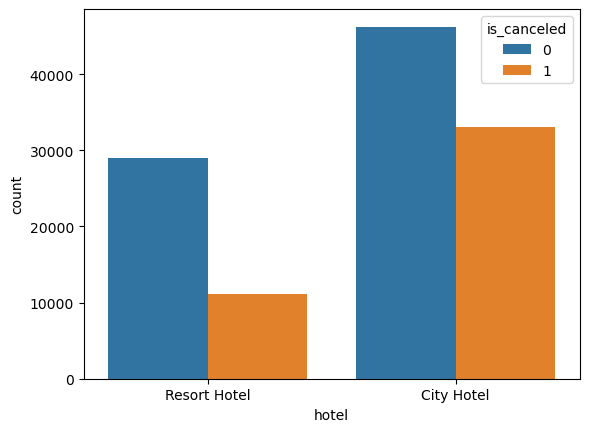

In [79]:
#plot
sns.countplot(data=df, x ='hotel', hue='is_canceled')
plt.show()



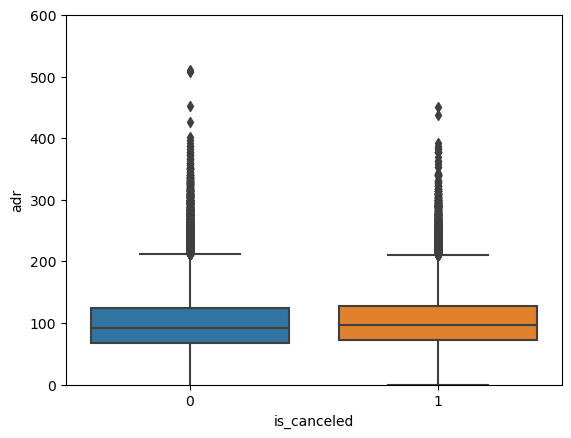

In [84]:
#boxplot
sns.boxplot(data=df,x ='is_canceled', y='adr')
plt.ylim(0,600)
plt.show()

**QUESTION FIVE**
Get minimum,maximums and means of the hotel datasets

In [47]:
#get max
df.iloc[:,9:].max(axis=0)

C:\Users\HP\AppData\Local\Temp\ipykernel_13108\689966410.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.iloc[:,9:].max(axis=0)


adults                                         55
children                                     10.0
babies                                         10
meal                                    Undefined
market_segment                          Undefined
distribution_channel                    Undefined
is_repeated_guest                               1
previous_cancellations                         26
previous_bookings_not_canceled                 72
reserved_room_type                              P
assigned_room_type                              P
booking_changes                                21
deposit_type                           Refundable
agent                                       535.0
company                                     543.0
days_in_waiting_list                          391
customer_type                     Transient-Party
adr                                        5400.0
required_car_parking_spaces                     8
total_of_special_requests                       5


In [48]:
#get min
df.iloc[:,9:].min(axis=0)

C:\Users\HP\AppData\Local\Temp\ipykernel_13108\2874914141.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.iloc[:,9:].min(axis=0)


adults                                     0
children                                 0.0
babies                                     0
meal                                      BB
market_segment                      Aviation
distribution_channel               Corporate
is_repeated_guest                          0
previous_cancellations                     0
previous_bookings_not_canceled             0
reserved_room_type                         A
assigned_room_type                         A
booking_changes                            0
deposit_type                      No Deposit
agent                                    1.0
company                                  6.0
days_in_waiting_list                       0
customer_type                       Contract
adr                                    -6.38
required_car_parking_spaces                0
total_of_special_requests                  0
reservation_status                  Canceled
reservation_status_date           2014-10-17
dtype: obj

In [49]:
#get mean
df.iloc[:,9:].mean(axis=0, skipna = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13108\2251630455.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.iloc[:,9:].mean(axis=0, skipna = True)


adults                              1.856403
children                            0.103890
babies                              0.007949
is_repeated_guest                   0.031912
previous_cancellations              0.087118
previous_bookings_not_canceled      0.137097
booking_changes                     0.221124
agent                              86.693382
company                           189.266735
days_in_waiting_list                2.321149
adr                               101.831122
required_car_parking_spaces         0.062518
total_of_special_requests           0.571363
dtype: float64